# Customer Segmentation

## Define the Question


An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4 and P5). After intensive market research, they’ve deduced that the behavior of new market is similar to their existing market. 

In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for different segment of customers. This strategy has work exceptionally well for them. They plan to use the same strategy on new markets and have identified 2627 new potential customers. 



### a) Specifying the Question

You are required to help the manager to predict the right group of the new customers.

### b) The Metric of Success

Build a Model that will be predict the right group of the new customers with an Accuracy above 85%

### c) The Context

An Automobile Company that wishes to segment its new customers based on a Customer Segmentation that done previously

### d) Experimental Design

Exploratory Data Analysis for this Project in a CRISP-DM format

**Data Description**

Variable	Definition
1. **ID**	-> Unique ID
2. **Gender** ->	Gender of the customer
3. **Ever_Married** ->	Marital status of the customer
4. **Age** ->	Age of the customer
5. **Graduated**	-> Is the customer a graduate?
6. **Profession**	-> Profession of the customer
7. **Work_Experience**	-> Work Experience in years
8. **Spending_Score**	-> Spending score of the customer
9. **Family_Size** ->	Number of family members for the customer (including the customer)
10. **Var_1**	-> Anonymised Category for the customer
11. **Segmentation** -> (target) Customer Segment of the customer

## Data Sourcing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Load the Train Dataset
segment = pd.read_csv("/content/Train_aBjfeNk.csv")

In [3]:
# Load the Test Dataset
segment_test = pd.read_csv("/content/Test_LqhgPWU.csv")


## Check the Data

### Training Dataset

In [4]:
segment.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [5]:
segment.tail()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B
8067,461879,Male,Yes,37,Yes,Executive,0.0,Average,3.0,Cat_4,B


In [6]:
# Check the Shape
segment.shape

(8068, 11)

In [7]:
# Information about the Data
segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


### Test Dataset

In [8]:
segment_test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [9]:
segment_test.tail()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4
2626,467968,Female,No,43,Yes,Healthcare,9.0,Low,3.0,Cat_7


In [10]:
# Dimension of the test data
segment_test.shape

(2627, 10)

In [11]:
# Information on the Dataset
segment_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


## Data Cleaning

### Training Dataset

In [12]:
# Drop Irrelevant Columns which is the ID column
segment.drop("ID",axis=1,inplace=True)

In [13]:
# Lower Case the column names
segment.columns = segment.columns.str.lower()

In [14]:
# Check for Missing Value
segment.isnull().sum()

gender               0
ever_married       140
age                  0
graduated           78
profession         124
work_experience    829
spending_score       0
family_size        335
var_1               76
segmentation         0
dtype: int64

In [15]:
# Deal with Missing Values

#Them replace with the mode of each and every column
categorical = ["ever_married", "graduated","profession","var_1"]

for column in categorical:
    segment[column] = segment[column].fillna(segment[column].mode()[0])



# Replace the Missing values with the Mean Value
segment["work_experience"] = segment['work_experience'].fillna(segment['work_experience'].mean())
segment['family_size'] = segment['family_size'].fillna(segment['family_size'].mean())

segment.isnull().sum()

gender             0
ever_married       0
age                0
graduated          0
profession         0
work_experience    0
spending_score     0
family_size        0
var_1              0
segmentation       0
dtype: int64

In [16]:
# Check for Duplicated values
segment.duplicated().any()

# No Duplicates

True

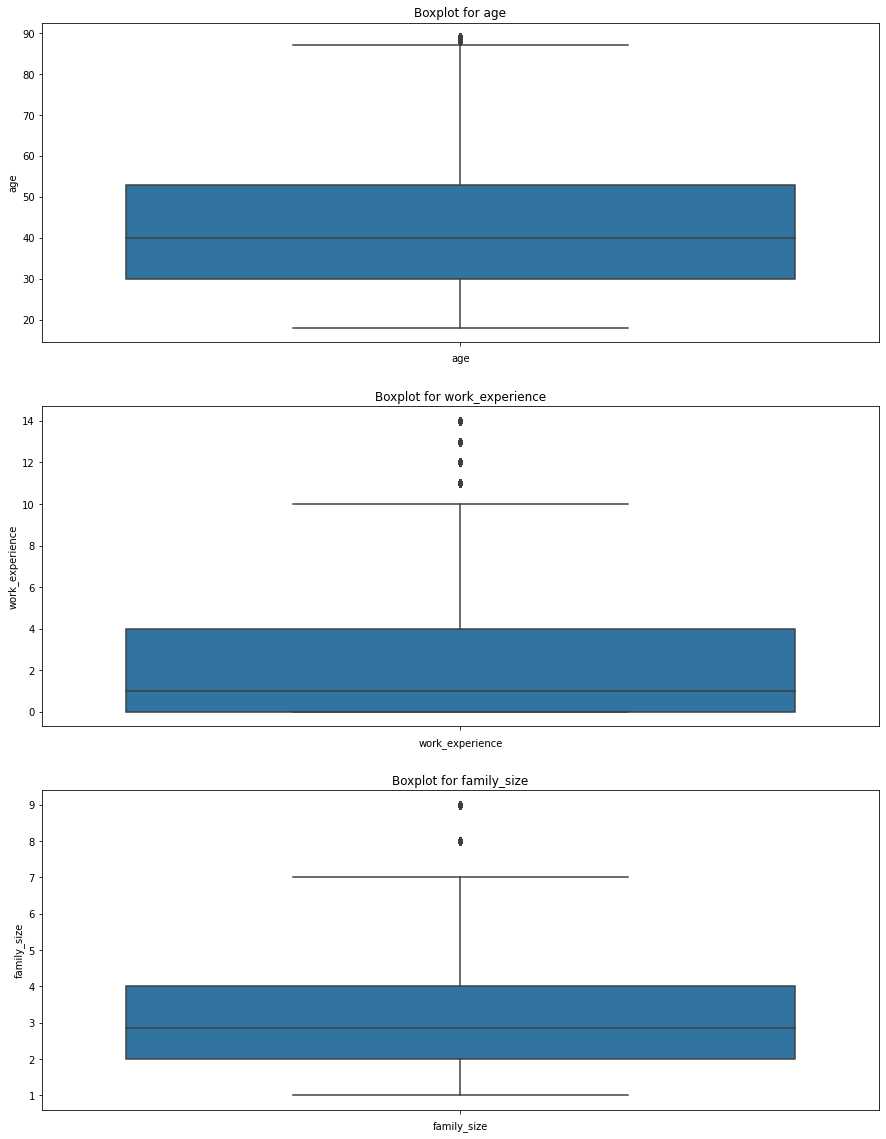

In [17]:
# Check for outliers
col_names = ["age","work_experience","family_size"]
fig,ax = plt.subplots(len(col_names),figsize=(15,20))

for i, col_val in enumerate(col_names):
  sns.boxplot(segment[col_val], ax=ax[i], orient= 'v')
  #plt.subplots_adjust(top= 1.5,bottom=0.5,hspace=2)
  ax[i].set_title('Boxplot for {}'.format(col_val))
  ax[i].set_xlabel(col_val, fontsize=10)

In [18]:
# Dropping Outliers

q3 = segment.quantile(0.75)
q1 = segment.quantile(0.25)

iqr = q3 -q1

segment_o = segment[~((segment < (q1 - 1.5 * iqr)) | (segment > (q3 + 1.5 * iqr))).any(axis=1)]

print("Shape before Outliers",segment.shape)
print("Shape after Outliers",segment_o.shape)


Shape before Outliers (8068, 10)
Shape after Outliers (7720, 10)


In [19]:
# Import the clean Dataset
segment_o.to_csv("segment_new.csv")

### Testing Dataset

In [20]:
# Check for Missing Value
segment_test.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [21]:
# Deal with Missing Values

#Them replace with the mode of each and every column
categorical1 = ["Ever_Married", "Graduated","Profession","Var_1"]

for column in categorical1:
    segment_test[column] = segment_test[column].fillna(segment_test[column].mode()[0])



# Replace the Missing values with the Mean Value
segment_test["Work_Experience"] = segment_test['Work_Experience'].fillna(segment_test['Work_Experience'].mean())
segment_test['Family_Size'] = segment_test['Family_Size'].fillna(segment_test['Family_Size'].mean())

segment_test.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

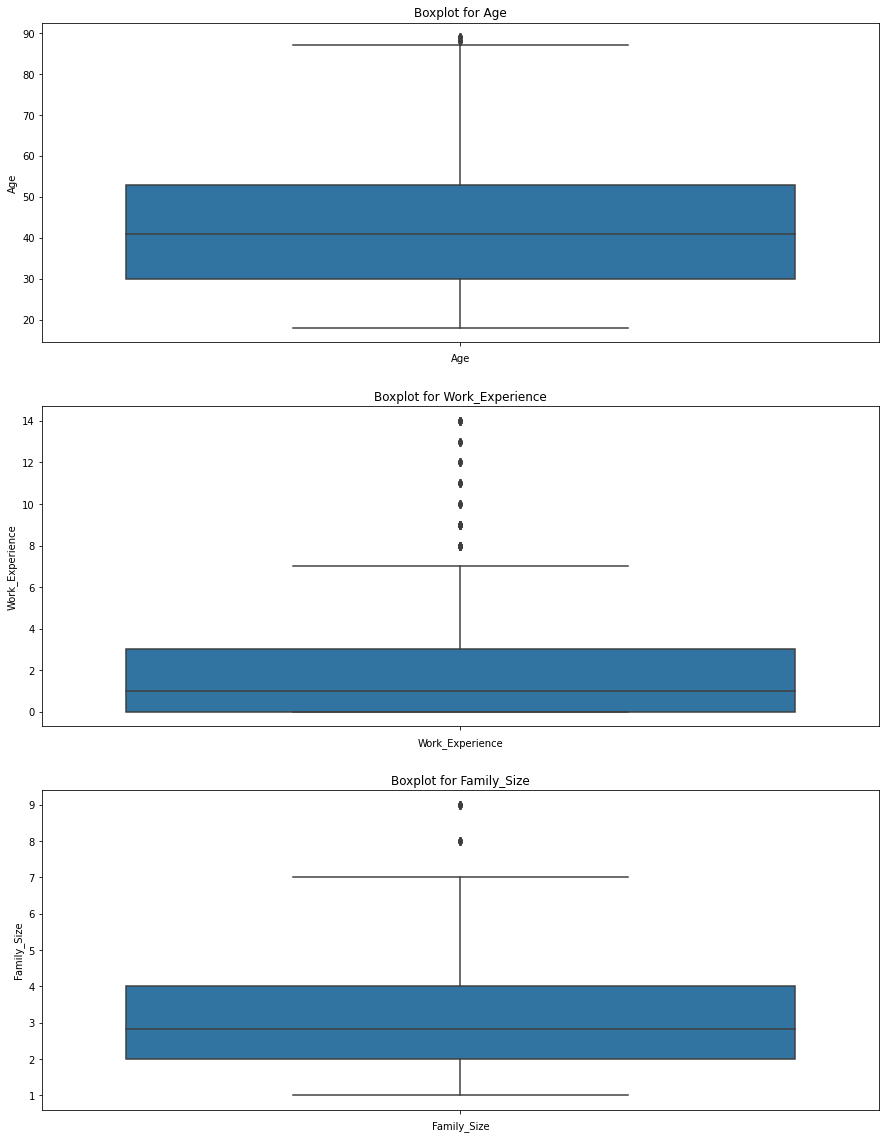

In [22]:
# Check for outliers
col_names = ["Age","Work_Experience","Family_Size"]
fig,ax = plt.subplots(len(col_names),figsize=(15,20))

for i, col_val in enumerate(col_names):
  sns.boxplot(segment_test[col_val], ax=ax[i], orient= 'v')
  #plt.subplots_adjust(top= 1.5,bottom=0.5,hspace=2)
  ax[i].set_title('Boxplot for {}'.format(col_val))
  ax[i].set_xlabel(col_val, fontsize=10)

In [23]:
# Import the clean Dataset
segment_test.to_csv("segment_test_new.csv")

## Exploratory Data Analysis

In [24]:
# Load the new Datasets
data = pd.read_csv("/content/segment_new.csv")
data_test = pd.read_csv("/content/segment_test_new.csv")

data.drop("Unnamed: 0",1,inplace=True)
data_test.drop("Unnamed: 0",1,inplace=True)

print(data.head())
print(data_test.head())

   gender ever_married  age  ... family_size  var_1  segmentation
0    Male           No   22  ...         4.0  Cat_4             D
1  Female          Yes   38  ...         3.0  Cat_4             A
2  Female          Yes   67  ...         1.0  Cat_6             B
3    Male          Yes   67  ...         2.0  Cat_6             B
4  Female          Yes   40  ...         6.0  Cat_6             A

[5 rows x 10 columns]
       ID  Gender Ever_Married  ...  Spending_Score Family_Size  Var_1
0  458989  Female          Yes  ...             Low         1.0  Cat_6
1  458994    Male          Yes  ...         Average         4.0  Cat_6
2  458996  Female          Yes  ...             Low         1.0  Cat_6
3  459000    Male          Yes  ...            High         2.0  Cat_6
4  459001  Female           No  ...             Low         4.0  Cat_6

[5 rows x 10 columns]


#### Univariate Analysis

Text(0.5, 1.0, 'Distribution on Gender')

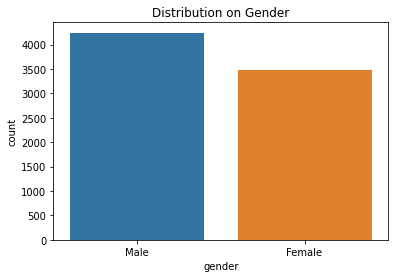

In [25]:
# Gender Distribution
sns.countplot(data['gender'])
plt.title("Distribution on Gender")

Text(0.5, 1.0, 'Distribution of Ever Married')

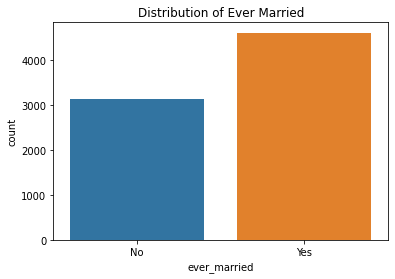

In [26]:
# Distribution of Ever Married
sns.countplot(data["ever_married"])
plt.title("Distribution of Ever Married")

Text(0.5, 1.0, 'Distribution on Graduated')

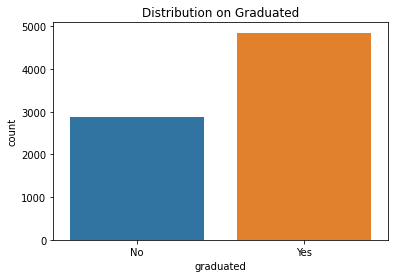

In [27]:
# Distribution of Graduated
sns.countplot(data["graduated"])
plt.title("Distribution on Graduated")

Text(0.5, 1.0, 'Distibution of Professionals')

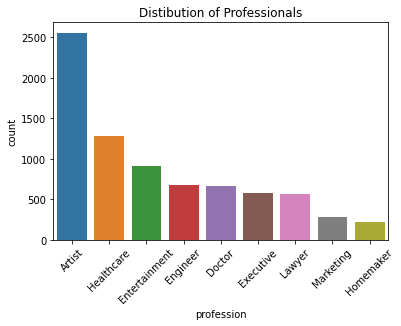

In [28]:
# Distribution of Profession
sns.countplot(data['profession'], order=data['profession'].value_counts().index)
plt.xticks(rotation = 45)
plt.title("Distibution of Professionals")

Text(0.5, 1.0, 'Distribution of Spending Score')

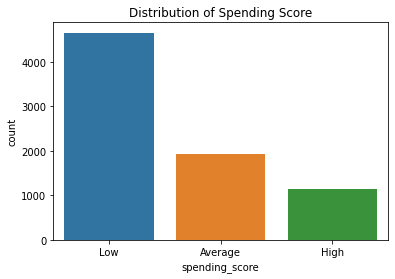

In [29]:
# Distribution of Spending Score
sns.countplot(data['spending_score'])
plt.title("Distribution of Spending Score")

Text(0.5, 1.0, 'Distibution of Customer Categories')

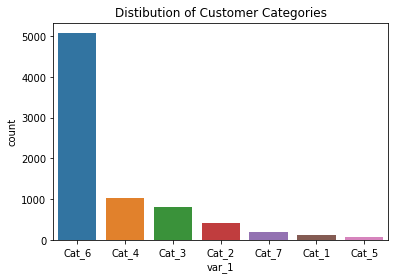

In [30]:
# Distribution of Anonymised Category
sns.countplot(data['var_1'], order=data['var_1'].value_counts().index)
plt.title("Distibution of Customer Categories")

Text(0.5, 1.0, 'Distbution of Customer Segments')

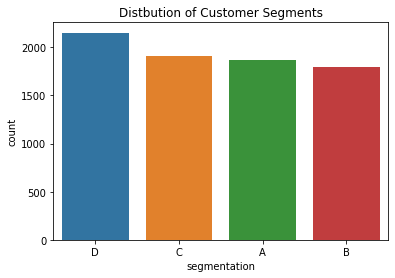

In [31]:
# Distbution of the Segments
sns.countplot(data['segmentation'],order=data['segmentation'].value_counts().index)
plt.title("Distbution of Customer Segments")

Text(0.5, 1.0, 'Distribution of Gender in Ever_Married')

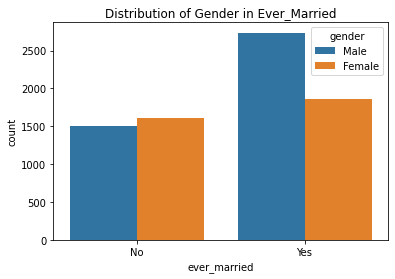

In [32]:
# Distribution of Gender in Ever_Married
sns.countplot(data['ever_married'], hue=data['gender'])
plt.title("Distribution of Gender in Ever_Married")

Text(0.5, 1.0, 'Distribution of Gender in Spending scores')

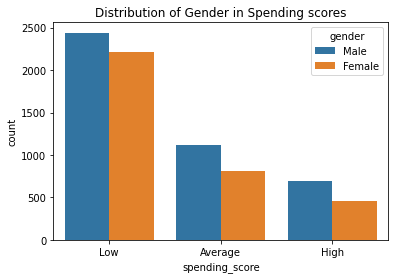

In [33]:
# Distribution of Gender in Spending scores
sns.countplot(data['spending_score'], hue=data['gender'])
plt.title("Distribution of Gender in Spending scores")

In [34]:
# Describe the Data
data.describe()

,age,work_experience,family_size
count,7720.000000,7720.000000,7720.000000
mean,43.331606,2.418278,2.800892
std,16.306127,2.884449,1.378032
min,18.000000,0.000000,1.000000
25%,31.000000,0.000000,2.000000
50%,41.000000,1.000000,2.850123
75%,53.000000,3.000000,4.000000
max,87.000000,10.000000,7.000000


In [35]:
# Label Encoding for Training Data
categorical_var  = ["gender","ever_married","graduated","profession","var_1","spending_score"]

from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
for i in categorical_var:
  data[i] = en.fit_transform(data[i])

data.head()

,gender,ever_married,age,graduated,profession,work_experience,spending_score,family_size,var_1,segmentation
0,1,0,22,0,5,1.000000,2,4.0,3,D
1,0,1,38,1,2,2.641663,0,3.0,3,A
2,0,1,67,1,2,1.000000,2,1.0,5,B
3,1,1,67,1,7,0.000000,1,2.0,5,B
4,0,1,40,1,3,2.641663,1,6.0,5,A


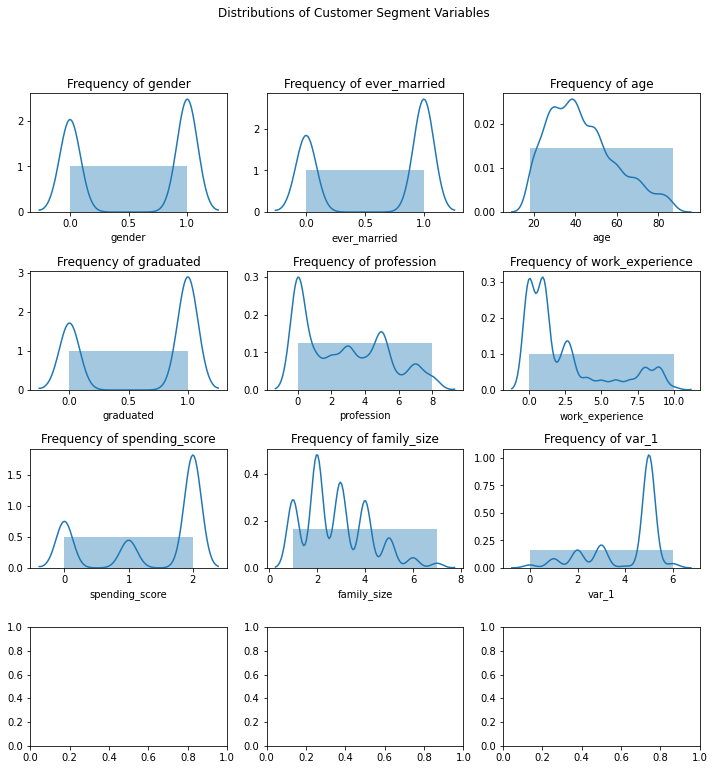

In [36]:
# Frequency distribution

fig, axes = plt.subplots(nrows=4, ncols=3, figsize = (12,12))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of Customer Segment Variables')

data_plots = data.drop("segmentation",1)

for ax, values, name in zip(axes.flatten(), data_plots.values.T, data_plots.columns):
    sns.distplot(values, ax=ax, bins=len(np.unique(data_plots.values.T[1]))//2)
    ax.set(title="Frequency of {}".format(name), xlabel=name)

#### Bivariate Analysis

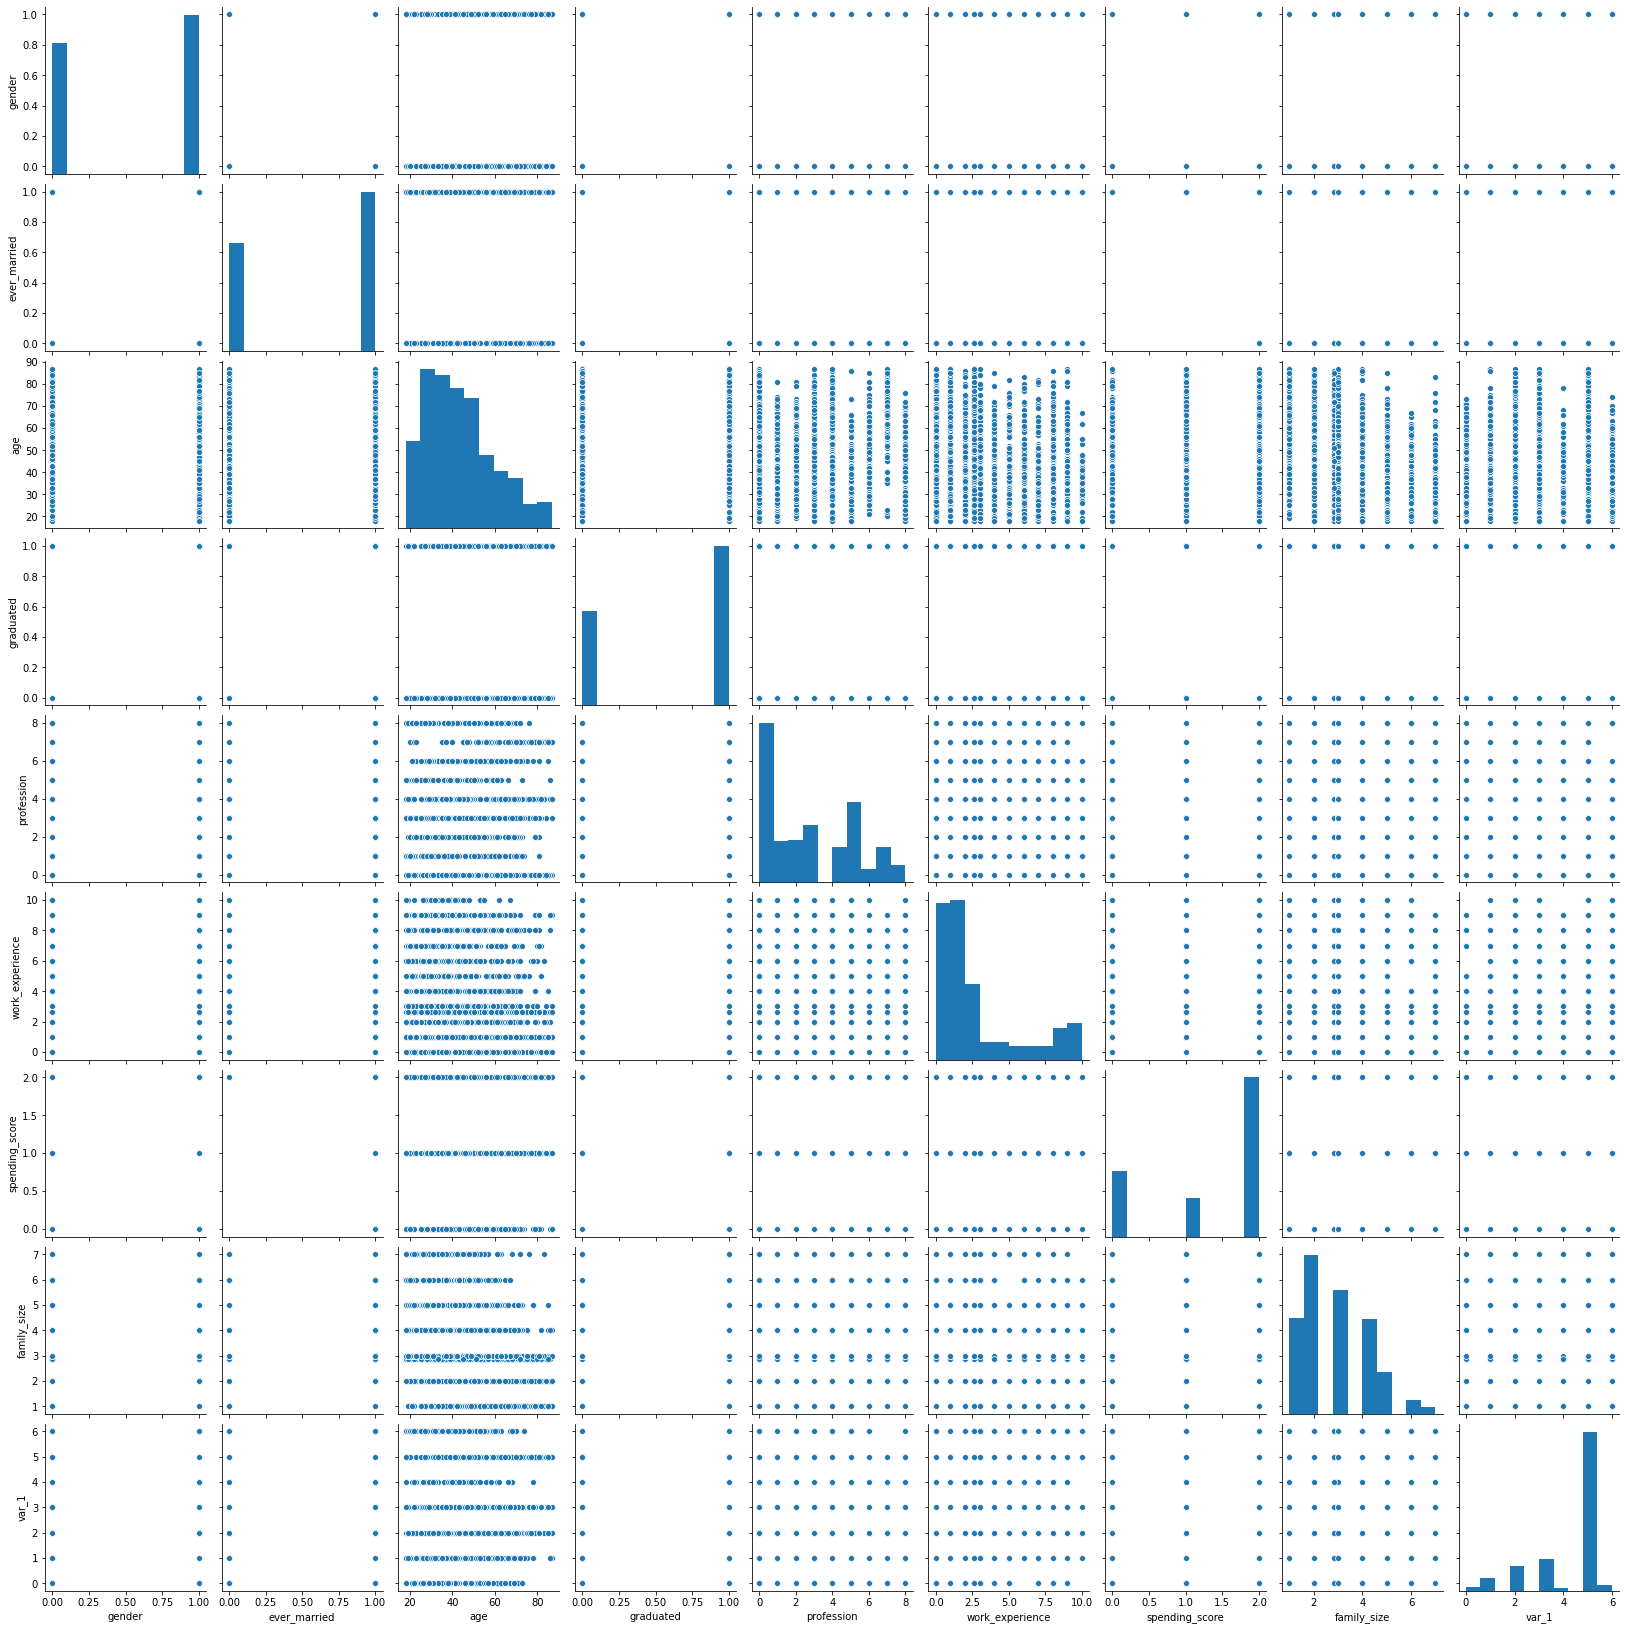

In [37]:
# Scatter Plot
sns.pairplot(data)

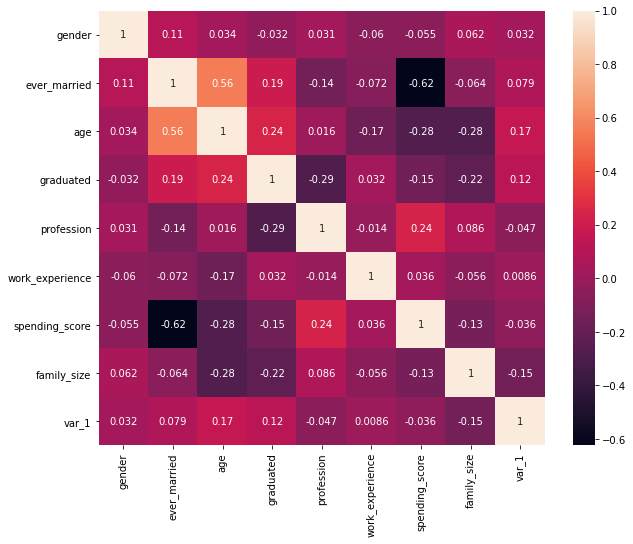

In [38]:
# Correlation between variables
plt.figure(figsize=(10,8))         
sns.heatmap(data.corr(), annot=True)

## Implement the Solution

In [39]:
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV


In [40]:
#Label Encode the Test Data
categorical_var2  = ["Gender","Ever_Married","Graduated","Profession","Var_1","Spending_Score"]

for i in categorical_var2:
  data_test[i] = en.fit_transform(data_test[i])

data_test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,0,1,36,1,2,0.000000,2,1.0,5
1,458994,1,1,37,1,5,8.000000,0,4.0,5
2,458996,0,1,69,0,0,0.000000,2,1.0,5
3,459000,1,1,59,0,4,11.000000,1,2.0,5
4,459001,0,0,19,0,8,2.552587,2,4.0,5


In [41]:
# Feature Scaling

x_train = data.drop("segmentation",1)
y_train = data['segmentation']
x_test = data_test.iloc[:,1:]
x_test

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


## Logistic Regression

In [42]:
# Apply Logistic Regression
LogReg = LogisticRegression()
LogReg.fit(x_train,y_train)

# Make Prediction

log_pred = LogReg.predict(x_test)

In [43]:
submission = pd.DataFrame(data_test["ID"])
submission["Segmentation"] = log_pred.tolist()
submission.to_csv('logreg.csv', index=False)


## K-Nearest Neighbours

In [44]:
# Fit the Model
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(x_train,y_train)

# Make Prediction
knn_pred = knn_model.predict(x_test)

# Save the Predictions
submission["Segmentation"] = knn_pred.tolist()
submission.to_csv("knn.csv",index=False)

## SVM

### SVM Linear

In [45]:
# Let's now build the svm model 
svc_model = SVC(kernel = 'linear')
svc_model.fit(x_train,y_train)

# Make prediction
svc_pred = svc_model.predict(x_test)

# Save the Predictions
submission["Segmentation"] = svc_pred.tolist()
submission.to_csv("svmmodel.csv",index=False)

### SVM Radial Basis

In [46]:
# Fit the model
svc_model_rbf = SVC(kernel= "rbf")
svc_model_rbf.fit(x_train,y_train)

# Make Prediction
rbf_pred = svc_model_rbf.predict(x_test)

# Save the Prediction
submission["Segmentation"] = rbf_pred.tolist()
submission.to_csv("rbfmodel.csv",index=False)

### Random Forest

In [47]:
# Fit the model
random_model = RandomForestClassifier()

grid_param = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 500, 800, 1000]
}

gd_sr = GridSearchCV(estimator=random_model,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

gd_sr.fit(x_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [48]:
# check for the best parameters
best_parameters = gd_sr.best_params_
print(best_parameters)

{'max_depth': 80, 'max_features': 2, 'min_samples_split': 12, 'n_estimators': 200}


In [49]:
# fit the model
final_model = RandomForestClassifier(n_estimators=100, max_depth=10, max_features='auto', min_samples_split=5)
final_model.fit(x_train,y_train)

# make prediction
rf_pred = final_model.predict(x_test)

# save the predictions
submission["Segmentation"] = rf_pred.tolist()
submission.to_csv("rfmodel.csv", index=False)

### Ada Boost

In [50]:
# Fit the Model
from sklearn.tree import DecisionTreeClassifier
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=8),
                          n_estimators=300, random_state=42)

ada_boost.fit(x_train,y_train)

# Make a prediction
ada_pred = ada_boost.predict(x_test)

# Save the predictions
submission["Segmentation"] = ada_pred.tolist()
submission.to_csv('adamodel.csv',index=False)

### Gradient Boosting

In [ ]:
gradient = GradientBoostingClassifier()

grid_param = {
    "n_estimators" : [100,300,500,600],
    "learning_rate" : [0.1,0.4,0.5],
    "max_depth" : [2,4,6,8,10]
}

gradient_sr = GridSearchCV(estimator=gradient,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)
 
gradient_sr.fit(x_train,y_train)

In [ ]:
# Fit the Model
target_number_of_trees = 500
gradient_model = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=0.1, max_depth=2)

gradient_model.fit(x_train,y_train)

# Make Prediction
gradient_pred = gradient_model.predict(x_test)

# Save the predictions
submission["Segmentation"] = gradient_pred.tolist()
submission.to_csv('gradientmodel.csv',index=False)

## Challenge the Solution